In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from arabic_reshaper import reshape
from bidi.algorithm import get_display

In [2]:
df = pd.read_csv(r'../data/bull.csv')
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19440\2778762013.py:1: DtypeWarning: Columns (4,5,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'../data/bull.csv')


,link,type,date,address,area,infrastructure,floors_sum,homes_num,floor_num,rooms,...,elevator,parking,desc,price,mortgage,rent,facilities,Dollar,address_no_digits,region
0,https://www.melkeirani.com/old/melk-77925-%D9%...,فروش آپارتمان,1398/01/17,ارمغان 7,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4,4,3,2,...,ندارد,دارد,وکالتی,250000000.0,NaN,NaN,"آبگرمکن,بخاری,پارکینگ,تراس,اپن,کمد دیواری,هود,",13391,ارمغان,11
1,https://www.melkeirani.com/old/melk-77923-%D9%...,فروش آپارتمان,1398/01/17,هاشمیه 59,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",3,7,3,2,...,ندارد,دارد,شش دانگ ملک,695000000.0,NaN,NaN,"شوفاژ,پکیج,انباری,پارکینگ,تراس,اپن,آیفون تصویر...",13391,هاشمیه,9
2,https://www.melkeirani.com/old/melk-77917-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی جنوبی 11 و 13,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",6,24,5,2,...,دارد,دارد,شش دانگ ملک,370000000.0,NaN,NaN,"انباری,پارکینگ,تراس,پنجره دوجداره,نگهبان,آسانس...",13391,حسابی جنوبی,10
3,https://www.melkeirani.com/old/melk-77922-%D9%...,فروش آپارتمان,1398/01/17,کوثر شمالی 30,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4,8,3,2,...,ندارد,دارد,شش دانگ ملک,450000000.0,NaN,NaN,"آبگرمکن,بخاری,انباری,پارکینگ,تراس,اپن,آیفون تص...",13391,کوثر شمالی,9
4,https://www.melkeirani.com/old/melk-77909-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی شمالی 35 و 37,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4,4,2,3,...,دارد,دارد,شش دانگ ملک,962500000.0,NaN,NaN,"شوفاژ,پکیج,اطفاء حریق,انباری,پارکینگ,تراس,پنجر...",13391,حسابی شمالی,10


In [11]:
df.loc[df['floors_sum'] < df['floor_num'], 'floors_sum'] = df['floor_num']
df.loc[df['rooms'] > 5, 'rooms'] = (df['rooms'] // 10).astype(int)
df.loc[df['age'] < 0, 'age'] = df['age'] * (-1)

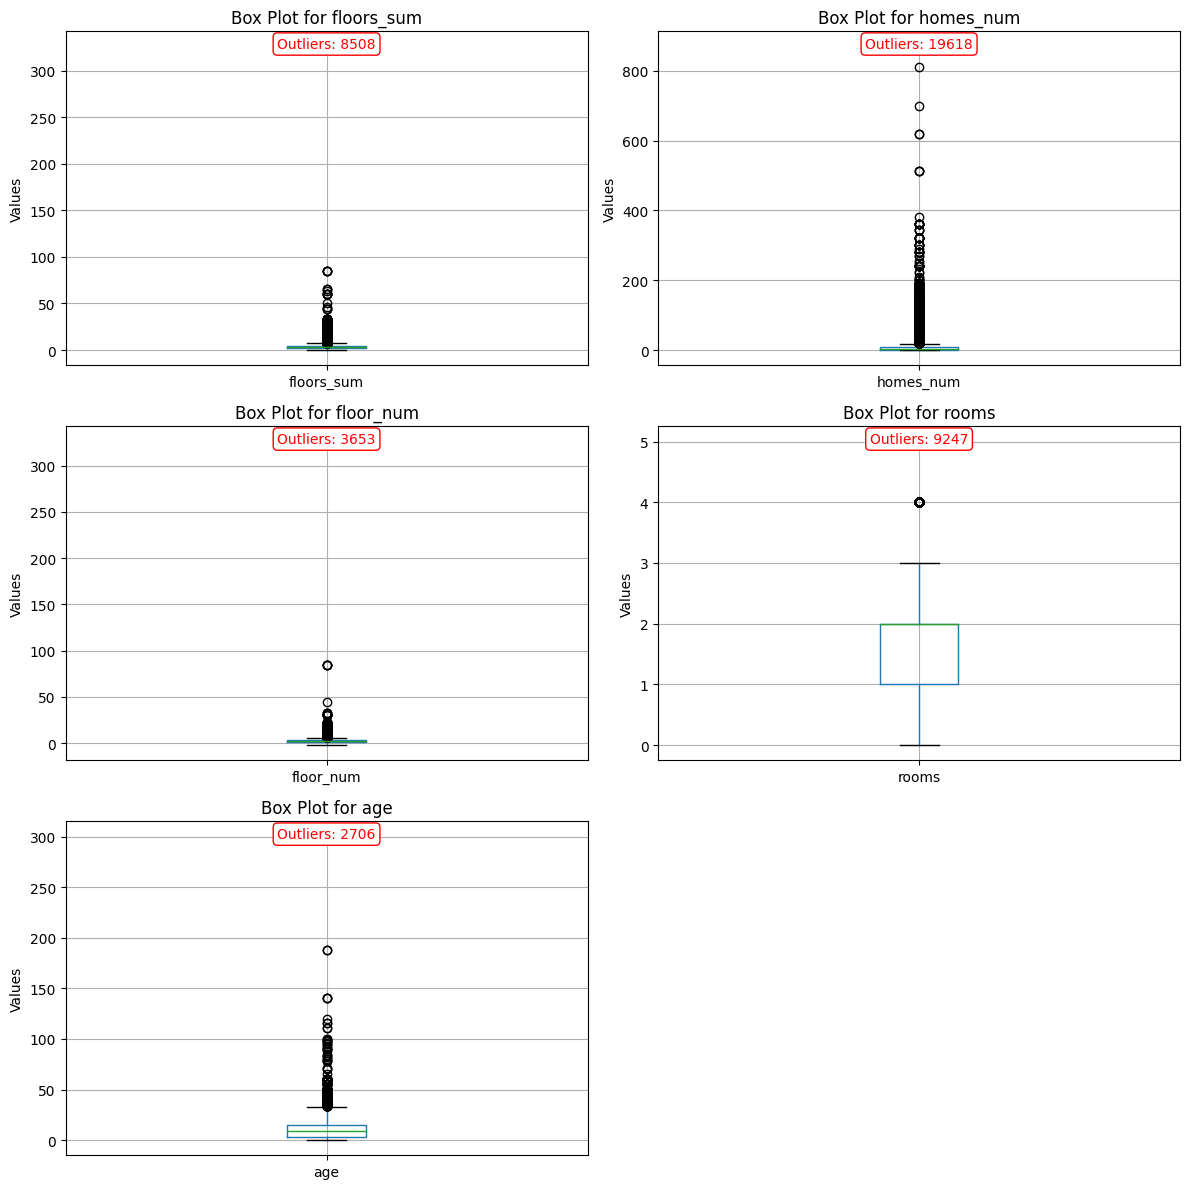

In [14]:
columns_to_plot = ['floors_sum', 'homes_num', 'floor_num', 'rooms', 'age']

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, 2)  # Calculate row and column index for 3x2 grid

    # Calculate IQR and outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Plot boxplot
    df[[column]].boxplot(ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot for {column}')
    axes[row, col].set_ylabel('Values')

    # Add outlier count as text annotation
    outlier_count = len(outliers)
    axes[row, col].annotate(
        f'Outliers: {outlier_count}', 
        xy=(0.5, 0.95), 
        xycoords='axes fraction', 
        ha='center', 
        fontsize=10, 
        color='red', 
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white')
    )

# Remove the unused subplot (bottom right in the 3x2 grid if necessary)
if len(columns_to_plot) < 6:
    fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


In [10]:
df['rooms'].value_counts()

rooms
2    208673
3     69077
1     64707
0     41994
4      7709
5      1538
Name: count, dtype: int64

In [13]:
df.to_csv('../data/bull.csv',encoding='utf-8-sig',index=False)

In [15]:
region_mean = df['region'].mean()

TypeError: can only concatenate str (not "int") to str

In [16]:
df['region'].value_counts()

region
9         84760
2         79719
10        61974
12        46141
11        41355
1         27898
8         19897
3          8107
7          7831
5          7704
6          3502
نامشخص     2198
13         2025
4           559
Name: count, dtype: int64

In [ ]:
regions = {
    1: [
        "احمد آباد", "راهنمایی", "فلسطین", "آبکوه", "ارشاد", "سجاد", "کفایی","پرستار","تورج","ملاصدرا","ابومسلم","بزرگمهر جنوبی","عارفی","هجرت","بعثت"
        "گوهرشاد", "کلاهدوز", "کوی دکتری", "صاحب الزمان", "سعد آباد", "شهید دستغیب","سناباد","احمدآباد","خیام","قرنی","قاضی طباطبایی","صادقی","سنایی","فرهاد","بیستون","ابوذرغفاری","ابوذر غفاری",
        "دانشگاه","بخارایی","عارف","پاستور","بنفشه","ناصرخسرو","بابک","ابن سینا","محتشمی","اسفندیانی","بهشت","ناصر خسرو","عدالت","توفیق","دانشسرا","سجاد - بهارستان","حامدجنوبی",
        "گوهرشاد","نیلوفر","منوچهری","اقاقیا","گلستان","منفرد","کاظمیه","پامچال","مسعود غربی","نبش مجد","ابونصر","گلایل","مجدشمالی","مجد شمالی",
        "حاشیه عطار","حاشیه ابوسعید","حامد  مرجان","آپادانا","تکتم","بلوار سازمان اب","مولوی","نوربخش","زنبق","مالک اشتر","تکتم  ایرج","اسرار"
    ],
    2: [
        "سپاد", "خین عرب", "کوشک مهدی", "عبادی", "مطهری", "ابوطالب", "کیان سنتر","ششصد دستگاه",
        "کوی امیرالمؤمنین", "فدک", "بهاران", "جانباز", "فرامرز عباسی", "هنرور","عجمی","حائری",
        "نوده", "کارخانه قند", "ابوطالب", "عبدالمطلب", "هدایت", "ایثارگران","توکلی","لعل","شیشه چی","طرحچی",
        "شفا", "سمزقند", "شهید هنرور", "شهید مطهری", "حسین باشی", "آیت الله عبادی","وصال","صبوری","هدابت","پژن","فاروجی"
        "کاشانی", "زرکش", "مشهدقلی", "نوده", "حجت", "خین عرب", "قدس", "نوید", "اسماعیل آباد","مطهری شمالی","شهید مطهری شمالی","فرامرز","موسوی قوچانی","نسترن"
        "مجد","خیام شمالی","کریمی","شهید کریمی","حرعاملی","حر عاملی","مطهری جنوبی","ساجدی","چراغچی","مهدی","ثمانه","عامل","کامیاب","ذوالفقار","امیر","توس","پردیس","خیبر",
        "فخر","یاس","تلاش","مجتمع تجاری پروما","توحید","علیزاده","نسترن","نکاح","جوادالائمه","ظفر","سپهر","خادم الشریعه","تعاون","رو به روی فتح"
    ],
    3: [
        "چهارراه شهدا", "خیابان شهید کامیاب", "رسالت جنوبی", "بزرگراه شهید میرزایی", "الماس شرق"
        "میدان امام حسین", "چهارراه گاز", "محله سیس آباد", "خواجه ربیع", "محله بلال", "امید","مجد","پژمان",
        "شهرک مهرگان", "خیر آباد", "فاطمیه", "گاز", "مسلم", "رسالت", "راه آهن", "مسلم جنوبی","فرامرز - رسالت","شیخ صدوق",
        "بهمن", "مهر مادر", "مهر مادر شمالی", "قرقی", "عباس آباد", "دروی", "طبرسی شمالی","حرم مطهر","شهرستانی","مسلم شمالی","مسلم","هاشمی‌نژاد","هاشمی نژاد"
    ],
    4: [
        "پنجتن", "کشف رود", "شهید مفتح", "امت", "شهید آوینی", "بزرگراه شهید بابانظر", 
        "شهید گمنام", "وحدت", "مجلسی شرقی", "طبرسی جنوبی", "تقاطع غیرهمسطح فجر", 
        "ایثار", "فجر", "وحید", "تلگرد", "کوی مهدی", "گلشور", "طلاب", "التیمور", 
        "رده", "شهید قربانی" ,"نبوت","نواب صفوی","ویرانی","میثم تمار"
    ],
    5: [
        "مهدی آباد", "ثامن", "امیرالمؤمنین", "شهید آوینی", "نیزه", "مهرآباد","گلریز","نوغان","رئوف","پنجراه",
        "جلالیه", "رضاییه", "سجادیه", "کوی سلمان", "حسین آباد","کوی امیرالمومنین","امیرالمومنین","حریری","آفتابی","سخاوت"
    ],
    6: [
        "شهرک شیرین", "آقا مصطفی خمینی", "امیرآباد", "شهید معقول", "کشاورز", 
        "شهید رجایی", "پورسینا", "کنه بیست", "اروند", "انصار", "شهید باهنر", 
        "شهید بسکآبادی", "چهنو", "مصلی", "کارمندان دوم", "کارمندان اول", "شهید رستمی", 
        "شیرودی", "کوی 22 بهمن","چمن","صفدری نژاد","مزدوری"
    ],
    7: [
        "کوی پلیس", "کوشش", "مقدم", "17 شهریور", "کارگران", "پروین اعتصامی","سحر","صبا",
        "طرق 2", "زارعین", "ابوذر", "انقلاب", "بهارستان", "خلج", "قائم", "فرودگاه","فرودگاه","سبحان",
        "المهدی", "سیدی", "عسگریه", "عنصری","شهریور","هفده شهریور","فلکه ضد ( خرداد)","خرداد","فدائیان اسلام"
    ],
    8: [
        "سرشور", "جنت", "آبشار", "بهشتی", "امام خمینی", "امام رضا","کوه سنگی","کوهسنگی","جهان آرا","شهرک طالقانی","نامجو","سعدی","پارس","میدان عدل خمینی","حکیم نظامی",
        "همت","فلکه برق (میدان بسیج)","دی","زیست خاور","بهار","جهان ارا","آبادگران","چهارراه مخابرات","دانش","سلامی","برج مهر کوهسنگی","مجتمع زیست خاور","کوهسنگی - رودکی",
        "امیرکبیر","خمینی","خرمشهر","ملک الشعرا","رزم","گلستان غربی","اندرزگو","فیاض بخش","سرای بلور","بازار مرکزی"
    ],
    9: [
        "طالقانی", "زکریا", "سرافرازان", "چهارچشمه", "کوثر", "رضاشهر","دقیقی","شاملو","مولانا","منتظری","خاکپور",
        "نوفل", "نیروهوایی", "شقایق 1", "شقایق 2", "گلدیس", "ولیعصر", "انتهای دلاوران","دعبل خزائی","خضرائی منش","ریاضی",
        "لادن", "اقبال", "آب و برق", "هنرستان", "هاشمیه","لاله","فکوری","صیاد","صیاد شیرازی","هفت تیر","پیروزی","فکوری","محله سرافرازان",
        "نماز","صدف","صارمی","خاقانی","ارغوان","زیتون","پایداری","کوثرشمالی","کوثر شمالی","محله هنرستان","هنرستان","محله کوثر","صابر","نخل","رهایی","رودکی"
        ,"محله چهارچشمه","کوثرجنوبی","کوثر جنوبی","ویلا","حافظیه","دهخدا","برونسی","نیاوران","دلاوران","حافظ","نارنج","غزال","سرافراز","فرخی","سامانیه","صیادشیرازی",
        "حق شناس","برکپور","سرو","کاوه","گلشن","انوری","میرکی","نوکاریزی","کلانتری","برسلانی","طیاری","لادن","کسائی","نوفل لوشاتو","نوفل","خورشید","تابان"
    ],
   10: [
        "رازی", "شریعتی", "شاهد", "فرهنگیان", "رسالت", "لشگر", "امامیه", "ادیب شمالی","راستی","امام دوست","راستان","میدان مادر","میدان حجاب","حجاب","پیامبراعظم","نرگس"
        "حجاب", "ایثارگران", "استاد یوسفی", "امام هادی", "خاتم الانبیا","قاسم‌آباد (شهرک غرب)" , "قاسم آباد","اندیشه","فلاحی","یوسفیه","رفیعی","مشکینی","حسابی","حسابی شمالی","ادیب"
        "شهرآرا", "رستگاری","بهورز","حسابی جنوبی","ادیب جنوبی","میعاد","آزادی","نهضت","شهرآرا","رادان","ابرار","استادیوسفی","استاد یوسفی","مروارید","هاشمی مهنه","چهارراه رستگاری","رستگاری",
        "نیکی"
    ],
    11: [
        "آزادشهر", "سیدرضی", "دانش آموز", "دانشجو", "شریف", "فارغ التحصیلان", "مهران","پژوهش","شیخ مفید","بیهقی",
        "تربیت", "شهید رضوی", "زیباشهر", "فرهنگ","امامت","جلال","جلال آل احمد","معلم","آزاده","آموزگار","ستاری","قانع","ارمغان","آرمان","سروش","دندانپزشکان","معاد",
        "استقلال","دندان پزشکان","شهیدقانع","شهید قانع","مدرس","دانش اموز","دادگر","سیدمرتضی","سید مرتضی","مهران","تعلیم"
    ],
    12: [
        "وکیل آباد", "امیریه", "الهیه", "مجیدیه", "جاهدشهر", "نمایشگاه", "رفسنجانی","مهدیه","علویه","منجم","خوش منظر","چناری","محترم"
        "صفی آباد", "رحمانیه", "نقویه", "صادقیه", "کلاته برفی", "چهاربرج", "فردوسی","اقدسیه","محمدیه","عصمتیه","میثاق","محله جاهدشهر","جاهدشهر","بوستان","تقویه"
    ],
    13:[
        "گلبهار - جمهوری","گلبهار","گلبهار جمهوری","گلبهار - فروردین","گلبهار فروردین","روبروی موج های خروشان","طرقبه","شاندیز"
    ]
}


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from rapidfuzz import process, fuzz  # Import سریع برای rapidfuzz
import pandas as pd
import numpy as np

# Preprocess regions
regions_flat = [(region, neighborhood) for region, neighborhoods in regions.items() for neighborhood in neighborhoods]
region_df = pd.DataFrame(regions_flat, columns=["region", "neighborhood"])

# Preprocess text normalization function
def normalize_text(text):
    text = text.strip().lower()
    text = text.replace("ي", "ی").replace("ك", "ک")
    return text

region_df["neighborhood"] = region_df["neighborhood"].apply(normalize_text)

# Vectorize with CountVectorizer
vectorizer = CountVectorizer().fit(region_df["neighborhood"])
region_vectors = vectorizer.transform(region_df["neighborhood"])

# Function to find region
def find_region(address):
    if pd.isna(address):
        return np.nan
    address = normalize_text(address)

    # 1. Exact match check
    for region, neighborhoods in regions.items():
        if address in map(normalize_text, neighborhoods):
            return region

    # 2. Cosine similarity fallback
    address_vector = vectorizer.transform([address])
    similarities = cosine_similarity(address_vector, region_vectors)
    max_index = np.argmax(similarities)
    max_similarity = similarities[0, max_index]

    # Dynamic threshold for cosine similarity
    threshold = np.mean(similarities) + 0.5 * np.std(similarities)
    if max_similarity > threshold:
        return region_df.iloc[max_index]["region"]

    # 3. Fuzzy matching fallback
    matches = process.extract(address, region_df["neighborhood"].tolist(), scorer=fuzz.partial_ratio, limit=1)
    if matches and matches[0][1] > 80:  # Threshold for fuzzy match (e.g., 80)
        matched_neighborhood = matches[0][0]
        return region_df.loc[region_df["neighborhood"] == matched_neighborhood, "region"].values[0]

    # 4. Default to unknown
    return "نامشخص"

# Apply the function
df["region"] = df["address_no_digits"].apply(find_region)


In [37]:
da = df[df['region']=='نامشخص']

In [45]:
da['address_no_digits'].value_counts()[40:80]

address_no_digits
بازار ملل        3
نضهت             3
عباسپور          3
طرقبه            3
چاهشک            3
کوچه شاهین فر    3
بنی هاشم         3
لویزان           3
شکری  -          3
زمین های جلدک    3
شوش              3
AZEVewLr         3
سعادت            3
کاشف اکبری       2
سرای یک          2
فتح المبین       2
گلچهره  آفرین    2
ابتدای شکری      2
رضوان            2
طلوع             2
چهارطبقه         2
مرشدلو           2
جمن              2
منطقه ویژه       2
ایستگاه سراب     2
نهصت             2
گلبرگ            2
مقابل صدر        2
AZLrIM           2
شوشتری           2
عطارغربی         2
عتصری            2
کتاب             2
عقدایی           2
اصلانی و         2
تقی اباد         2
اراسته           2
زمرد             2
پرورش            2
اراضی چاهشک      2
Name: count, dtype: int64